# Assignment 5(i) using tensorflow
# Nidhi
# MDS202222

# Importing all th required libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import pandas as pd
import cv2


# Authenticate and mount Google Drive


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/My Drive/Assignment-5/train'
test_dir = '/content/drive/My Drive/Assignment-5/test1'
val_dir = '/content/drive/My Drive/Assignment-5/val'


# Pre-processing of the images


In [ ]:
x_train=[]

for folder in os.listdir(train_dir):

    sub_path=train_dir+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_dir):

    sub_path=test_dir+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_dir):

    sub_path=val_dir+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)
#Now, x_train,x_train and x_val must be divided by 255.0 for normalization.

train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 168 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
train_y=training_set.classes
val_y=val_set.classes
test_y=test_set.classes


In [ ]:
training_set.class_indices
train_y.shape,val_y.shape,test_y.shape

((168,), (50,), (50,))

# Model Building

In [ ]:
IMAGE_SIZE = [224, 224]

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False


In [ ]:
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Compiling the model


In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

# Fitting the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
6/6 [==============================] - 178s 30s/step - loss: 1.7147 - accuracy: 0.5000 - val_loss: 0.3938 - val_accuracy: 0.8600
Epoch 2/10
6/6 [==============================] - 168s 29s/step - loss: 0.5096 - accuracy: 0.7262 - val_loss: 0.5135 - val_accuracy: 0.7600
Epoch 3/10
6/6 [==============================] - 168s 29s/step - loss: 0.3006 - accuracy: 0.8571 - val_loss: 0.3617 - val_accuracy: 0.8400
Epoch 4/10
6/6 [==============================] - 176s 31s/step - loss: 0.1873 - accuracy: 0.9464 - val_loss: 0.1697 - val_accuracy: 0.9400
Epoch 5/10
6/6 [==============================] - 168s 29s/step - loss: 0.0744 - accuracy: 0.9762 - val_loss: 0.2107 - val_accuracy: 0.9000
Epoch 6/10
6/6 [==============================] - 169s 29s/step - loss: 0.0320 - accuracy: 0.9940 - val_loss: 0.1524 - val_accuracy: 0.9200
Epoch 7/10
6/6 [==============================] - 168s 29s/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.1354 - val_accuracy: 0.9400
Epoch 8/10
6/6 [====

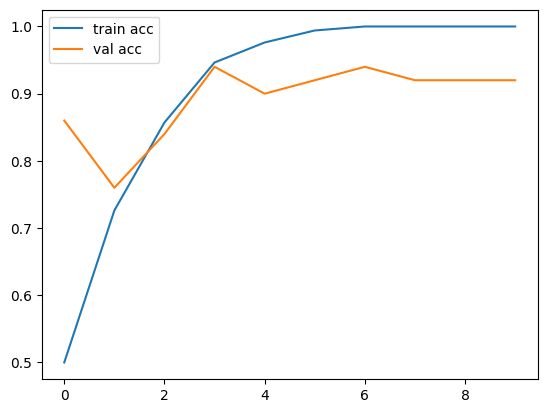

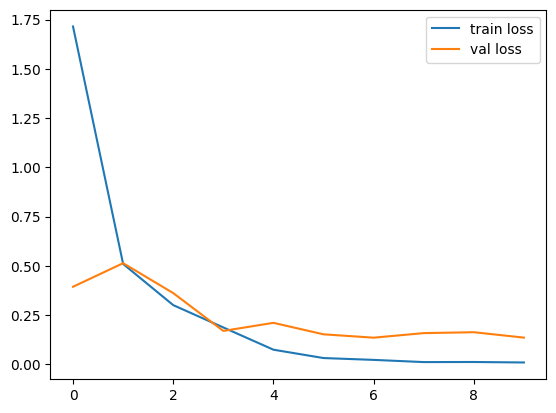

In [ ]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()


# Model Evaluation

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)


2/2 [==============================] - 37s 14s/step - loss: 0.2514 - accuracy: 0.9200


[0.25139856338500977, 0.9200000166893005]

# Confusion Matrix

In [ ]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

2/2 [==============================] - 39s 14s/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.92      0.92      0.92        25

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

[[23  2]
 [ 2 23]]
